<a href="https://colab.research.google.com/github/hamdi-trikii/Data-Management-in-Python/blob/main/12_Analyzing_Crime_in_Los_Angeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World!

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


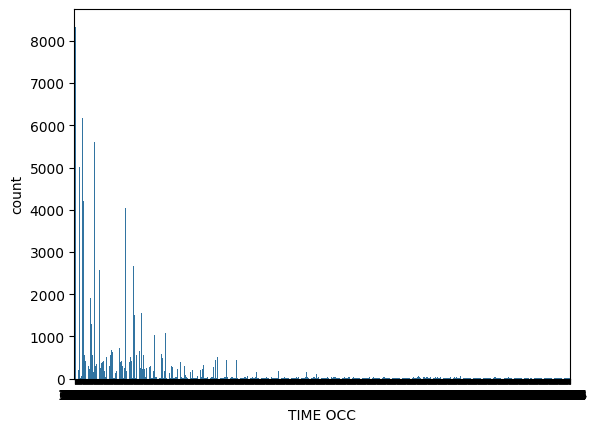

In [2]:
#Finding the frequencies of crimes by the hour of occurrence
crimes['HOUR OCC'] = crimes['TIME OCC'].str[:2].astype(int)
crimes.head()

sns.countplot(data=crimes,x="TIME OCC")
#plt.title('Crime Distribution by Hour')
#plt.xlabel('Hour of Occurrence')
#plt.ylabel('Number of Crimes')
plt.show()

peak_crime_hour = 12



In [3]:
#Identifying the area with the most night crime
night_crimes = crimes[crimes['HOUR OCC'].isin([x for x in range(24)])]

# Display the new DataFrame
print(night_crimes.head())

crime_by_area = crimes.groupby('AREA NAME')['HOUR OCC'].count()
# Sort the results in descending order
sorted_crime_by_area = crime_by_area.sort_values(ascending=False)

# Extract the area with the highest count
peak_night_crime_location = sorted_crime_by_area.index[0]

# Display the result
print("Peak Night Crime Location:", peak_night_crime_location)

       DR_NO  Date Rptd   DATE OCC TIME OCC    AREA NAME  \
0  221412410 2022-06-15 2020-11-12     1700      Pacific   
1  220314085 2022-07-22 2020-05-12     1110    Southwest   
2  222013040 2022-08-06 2020-06-04     1620      Olympic   
3  220614831 2022-08-18 2020-08-17     1200    Hollywood   
4  231207725 2023-02-27 2020-01-27     0635  77th Street   

                                       Crm Cd Desc  Vict Age Vict Sex  \
0  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN   
1                                THEFT OF IDENTITY        27        F   
2                                THEFT OF IDENTITY        60        M   
3                                THEFT OF IDENTITY        28        M   
4                                THEFT OF IDENTITY        37        M   

  Vict Descent Weapon Desc  Status Desc  \
0          NaN         NaN  Invest Cont   
1            B         NaN  Invest Cont   
2            H         NaN  Invest Cont   
3            H         NaN  

In [4]:
#Crimes by age grou
# Inspect the minimum and maximum values in "Vict Age" to determine bin edges
min_age = crimes['Vict Age'].min()
max_age = crimes['Vict Age'].max()

# Define the age bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Create a new column "Age Bracket" using pd.cut(), excluding negative age values
crimes['Age Bracket'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels)

# Count the occurrences of each age group
victim_ages = crimes['Age Bracket'].value_counts()

# Display the count of crimes by victim age group
print(victim_ages)

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Age Bracket, dtype: int64
